In [1]:
# 线性回归
# y = w*x + b
# 使用pytorch求解w,b

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

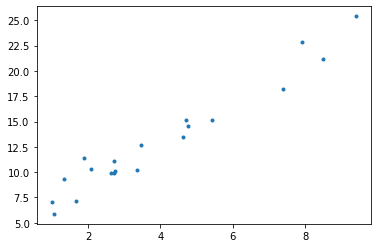

In [3]:
# y = 2*x + 5
# 生成模拟数据
x = torch.rand(20)*10
y = 2*x + 5 + torch.randn(20)

plt.plot(x, y, '.')
plt.show()

No: 0
loss: 152.35079956054688


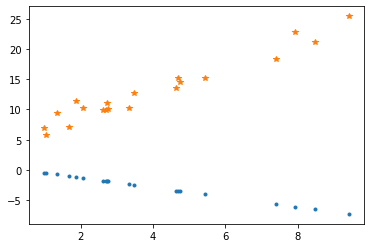

No: 100
loss: 0.9679519534111023


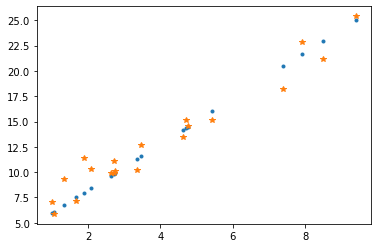

No: 200
loss: 0.7441045641899109


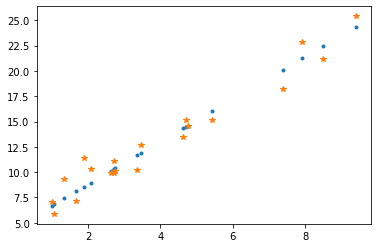

No: 300
loss: 0.7198536396026611


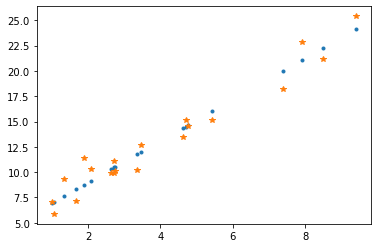

No: 400
loss: 0.7172262072563171


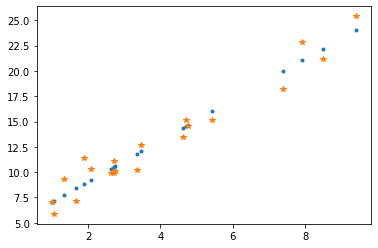

No: 500
loss: 0.7169414758682251


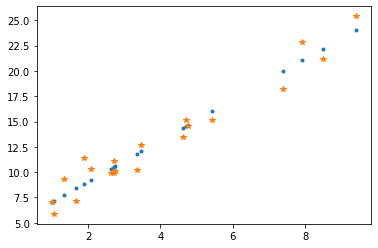

w=2.0230257511138916
b=5.024035930633545


In [4]:
w = torch.randn(1, requires_grad=True) # 需要计算梯度
b = torch.randn(1, requires_grad=True) # 需要计算梯度
lr = 0.04 # 注意太小收敛慢，太大会发散

_loss = 10000
for i in range(10000):
    y_pred = torch.mul(w, x) + b # 预测值
    loss = (0.5*(y - y_pred) ** 2).mean() # 计算损失
    loss.backward() # 计算梯度
    w.data.sub_(lr*w.grad) # 更新w
    b.data.sub_(lr*b.grad) # 更新b
    w.grad.zero_() # 清除梯度，否则梯度会不断累加
    b.grad.zero_()
    if i % 100 == 0: # 每100次画个图
        print("No:", i)
        print("loss:",loss.item())
        plt.plot(x, y_pred.data, '.')
        plt.plot(x, y, '*')
        plt.show()
        if abs(_loss - loss) < 0.001: # 当损失变化很小时，停止迭代
            break
        _loss = loss
print("w=%s" % w.item())
print("b=%s" % b.item())